# Analysis of Marlowe Benchmarking

## Setup

In [1]:
require(data.table)
require(ggplot2)

Loading required package: data.table
Loading required package: ggplot2


## Protocol limits

In [2]:
maxMemory = 14000000
maxCPU = 10000000000

## Semantics Validator

### Read the benchmarking results

In [3]:
semantics <- fread("marlowe-semantics.tsv", integer64 = "numeric")

summary(semantics)

  Validator            Script              TxId            Measured CPU      
 Length:100         Length:100         Length:100         Min.   :5.507e+08  
 Class :character   Class :character   Class :character   1st Qu.:1.197e+09  
 Mode  :character   Mode  :character   Mode  :character   Median :1.778e+09  
                                                          Mean   :2.155e+10  
                                                          3rd Qu.:2.815e+09  
                                                          Max.   :5.642e+11  
 Measured Memory     Reference CPU       Reference Memory    Message       
 Min.   :2.943e+06   Min.   :5.265e+08   Min.   :  1990032   Mode:logical  
 1st Qu.:6.524e+06   1st Qu.:1.082e+09   1st Qu.:  3789654   NA's:100      
 Median :9.499e+06   Median :1.655e+09   Median :  6012158                 
 Mean   :9.939e+09   Mean   :1.373e+10   Mean   : 41798673                 
 3rd Qu.:2.207e+07   3rd Qu.:2.373e+09   3rd Qu.:  8687368                

### Plot the benchmarking results against the reference (production) case

#### First use a log scale to see all of the data

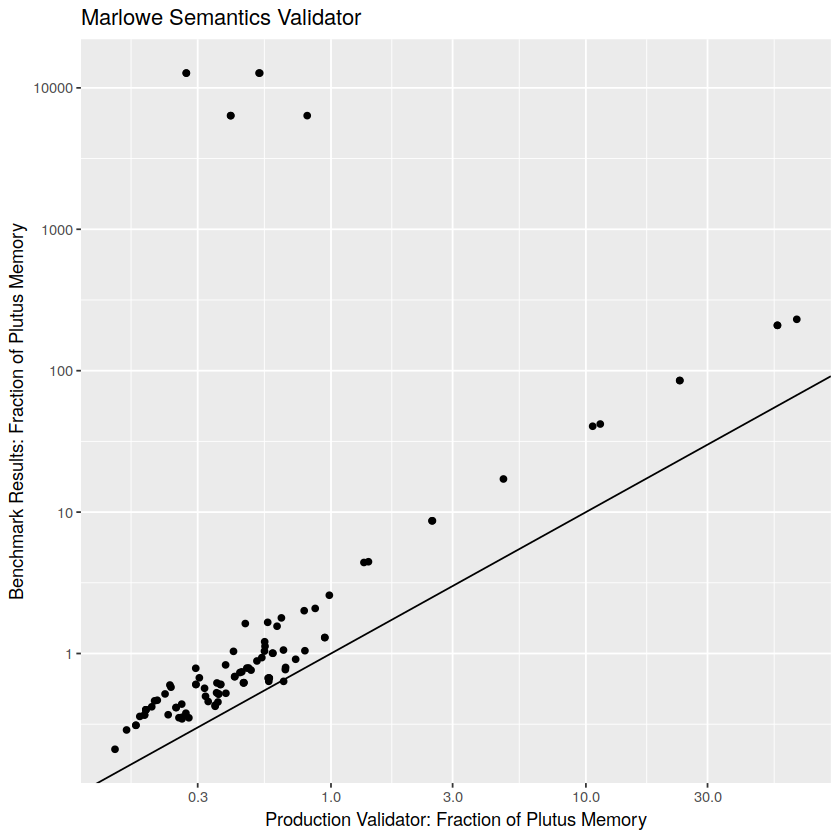

In [4]:
ggplot(
    semantics,
    aes(x=`Reference Memory` / maxMemory, y=`Measured Memory` / maxMemory)
) +
  geom_point() +
  geom_abline(intercept=0, slope=1) +
  scale_x_log10() +
  scale_y_log10() +
  xlab("Production Validator: Fraction of Plutus Memory") +
  ylab("Benchmark Results: Fraction of Plutus Memory") +
  ggtitle("Marlowe Semantics Validator")

In [5]:
ggsave("marlowe-semantics-logscale.png", width=6, height=6, units="in")

## Now zoom in on cases where the production validator executes in under the protocol limits

Warning message:
“Removed 7 rows containing missing values (geom_point).”

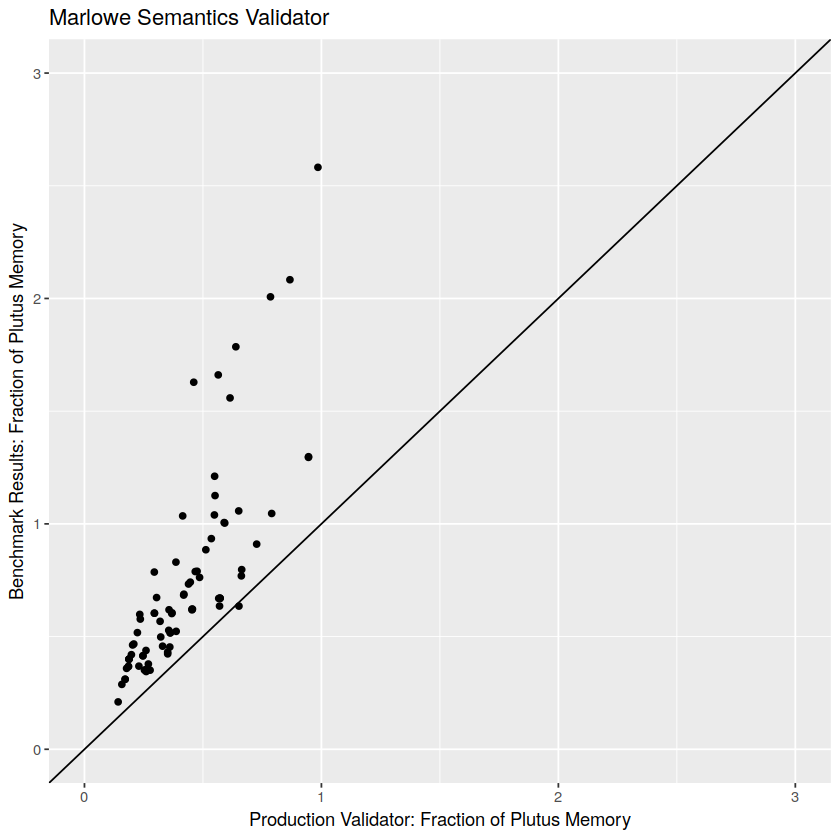

In [6]:
ggplot(
    semantics[`Reference Memory` <= maxMemory],
    aes(x=`Reference Memory` / maxMemory, y=`Measured Memory` / maxMemory)
) +
  geom_point() +
  geom_abline(intercept=0, slope=1) +
  xlim(0, 3) +
  ylim(0, 3) +
  xlab("Production Validator: Fraction of Plutus Memory") +
  ylab("Benchmark Results: Fraction of Plutus Memory") +
  ggtitle("Marlowe Semantics Validator")

In [7]:
ggsave("marlowe-semantics-zoomed.png", width=6, height=6, units="in")

Warning message:
“Removed 7 rows containing missing values (geom_point).”

## Role-payout validator

### Read the data file

In [8]:
rolepayout <- fread("marlowe-rolepayout.tsv", integer64 = "numeric")

summary(rolepayout)

  Validator            Script              TxId            Measured CPU      
 Length:100         Length:100         Length:100         Min.   :369557039  
 Class :character   Class :character   Class :character   1st Qu.:388556784  
 Mode  :character   Mode  :character   Mode  :character   Median :404743662  
                                                          Mean   :417052364  
                                                          3rd Qu.:441869479  
                                                          Max.   :570178991  
 Measured Memory   Reference CPU       Reference Memory  Message       
 Min.   :1992738   Min.   :310846619   Min.   :1099224   Mode:logical  
 1st Qu.:2109030   1st Qu.:331084800   1st Qu.:1186762   NA's:100      
 Median :2165842   Median :355239984   Median :1286122                 
 Mean   :2213914   Mean   :367152775   Mean   :1334024                 
 3rd Qu.:2298342   3rd Qu.:394593771   3rd Qu.:1443498                 
 Max.   :2849382   Max

### A linear scale is sufficent for this comparison.

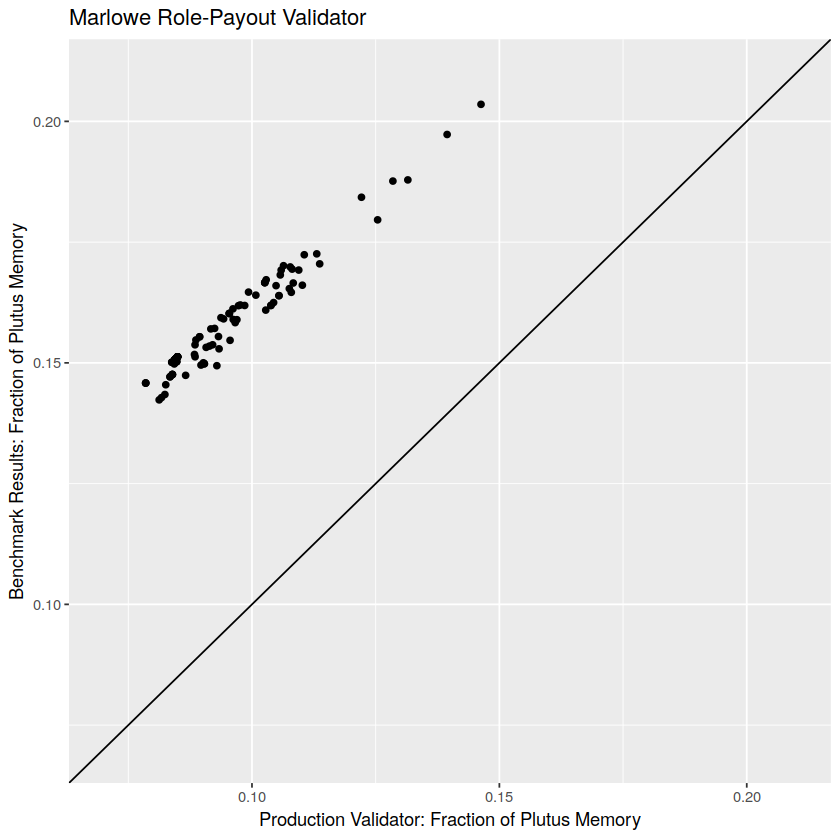

In [9]:
ggplot(
    rolepayout[`Reference Memory` <= maxMemory],
    aes(x=`Reference Memory` / maxMemory, y=`Measured Memory` / maxMemory)
) +
  geom_point() +
  geom_abline(intercept=0, slope=1) +
  xlim(0.07, 0.21) +
  ylim(0.07, 0.21) +
  xlab("Production Validator: Fraction of Plutus Memory") +
  ylab("Benchmark Results: Fraction of Plutus Memory") +
  ggtitle("Marlowe Role-Payout Validator")

In [10]:
ggsave("marlowe-rolepayout.png", width=6, height=6, units="in")